In [3]:
df = pd.read_csv("resumen_gastos.csv")
df.head()

,Mes,efectivo,gasolina,movimientos_interno,restaurantes,seguros,colegios,gym,comida,movil_internet,...,hipoteca,impuestos,limpieza,viajes,ocio,Gastos/ingreso_oli,MJ,loteria,coche,oposiciones
0,Oct-2012,20.0,68.43,10.0,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Nov-2012,170.0,254.80,20.0,58.95,333.23,276.0,89.53,232.84,70.28,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Dec-2012,580.0,167.13,1400.0,0.00,83.42,0.0,89.53,626.23,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Jan-2013,100.0,168.60,30.7,83.73,175.55,0.0,89.53,391.25,44.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Feb-2013,80.0,232.84,676.6,270.47,562.75,0.0,89.53,313.01,111.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
nuevo_df = df[["Mes", "comida"]]


In [5]:
nuevo_df.to_csv('nuevo_df.csv', index=False)

/var/folders/8g/yj4fgsmn6q59m4_81r8zknph0000gn/T/ipykernel_32661/701579542.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pjme=pd.read_csv('nuevo_df.csv', index_col=[0], parse_dates=[0])


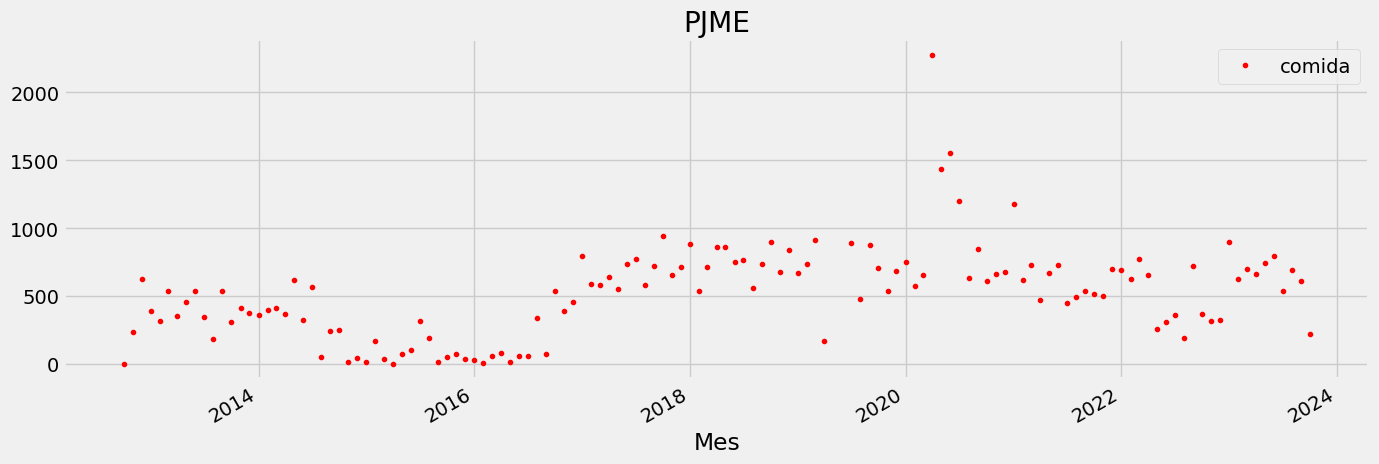

In [6]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from prophet import Prophet


from sklearn.metrics import mean_squared_error, mean_absolute_error

plt.style.use('fivethirtyeight')
# datos, consumo de energia

pjme=pd.read_csv('nuevo_df.csv', index_col=[0], parse_dates=[0])
pjme.tail()
_=pjme.plot(style='.', figsize=(15, 5), color='r', title='PJME')



In [14]:
pjme

,comida
Mes,
2012-10-01,0.00
2012-11-01,232.84
2012-12-01,626.23
2013-01-01,391.25
2013-02-01,313.01
...,...
2023-06-01,795.51
2023-07-01,534.93
2023-08-01,689.54


In [19]:
%%time

split_date='01-Jan-2020'

train=pjme.loc[pjme.index<=split_date].copy()

test=pjme.loc[pjme.index>split_date].copy()


# IMPORTANTE, fbprophet necesita estos nombres de columnas

train=train.reset_index().rename(columns={'Mes':'ds', 'comida':'y'})

test=test.reset_index().rename(columns={'Mes':'ds', 'comida':'y'})


modelo=Prophet().fit(train)

pred=modelo.predict(test)

print(pred)

13:07:52 - cmdstanpy - INFO - Chain [1] start processing
13:07:52 - cmdstanpy - INFO - Chain [1] done processing


           ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0  2020-02-01  683.812359  404.184551   975.548057   683.812332   683.812383   
1  2020-03-01  690.120315  293.771984   861.316660   690.120180   690.120409   
2  2020-04-01  696.863302  507.189047  1070.362413   696.863008   696.863520   
3  2020-05-01  703.388773  475.993333  1041.624029   703.388295   703.389153   
4  2020-06-01  710.131760  575.938622  1175.624937   710.131064   710.132359   
5  2020-07-01  716.657231  473.589243  1036.539950   716.656323   716.658030   
6  2020-08-01  723.400218  484.920249  1059.442568   723.399022   723.401300   
7  2020-09-01  730.143205  391.574251   957.768976   730.141743   730.144594   
8  2020-10-01  736.668676  490.198591  1062.966722   736.666823   736.670405   
9  2020-11-01  743.411663  444.462965  1018.951028   743.409433   743.413684   
10 2020-12-01  749.937135  577.660706  1144.648267   749.934591   749.939466   
11 2021-01-01  756.680122  642.855036  1

In [20]:
pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-01,692.563562,404.184551,975.548057
1,2020-03-01,574.795819,293.771984,861.316660
2,2020-04-01,790.371477,507.189047,1070.362413
3,2020-05-01,756.512382,475.993333,1041.624029
4,2020-06-01,879.840993,575.938622,1175.624937
5,2020-07-01,755.717611,473.589243,1036.539950
6,2020-08-01,758.812368,484.920249,1059.442568
7,2020-09-01,677.469915,391.574251,957.768976
8,2020-10-01,788.764653,490.198591,1062.966722
9,2020-11-01,728.589412,444.462965,1018.951028


/Users/valentincortespuya/anaconda3/envs/scrapeo/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/valentincortespuya/anaconda3/envs/scrapeo/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


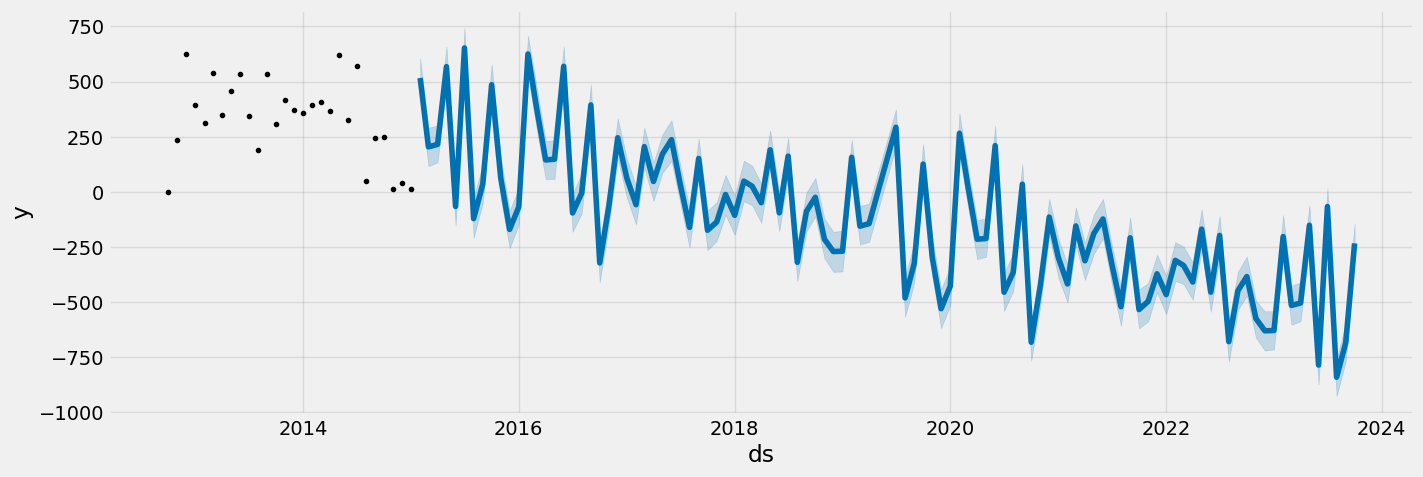

In [18]:
f, ax=plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)

fig=modelo.plot(pred, ax=ax)